### Annual anthrax Prediction in Ethiopia

1. Project overview
2. Problem framing
3. Goal 
4. Import the required libraries and read the dataset
5. Perform descriptive analysis
6. Data pre-processing  -   
    6.1. Setting date as Index  
    6.2. Setting frequency as month
7. Exploratory Data Analysis (EDA) 
8. Normalization & Train-test Split  
    8.1. Perform train-test split
9. Modelling    
9.1. Define learning rate, number of epochs, and optimizer  
9.2. Build a sequential model with LSTM layer and dense layers  
9.3. Fit and train the Model    
10. Make predictions on the test data   
10.1. Plot the results


-Project overview
- This is a Deep-learning time series forecasting project from end-to-end, from defining the problem to training a final model and making predictions. This project is not exhaustive, but shows how you can get good results quickly by working through a time series forecasting problem systematically. The steps of this project will include:

-Problem framing
* The problem is to predict annual anthrax outbreaks in Ethiopia. The dataset provides the annual anthrax outbreak in Ethiopia from 2014 to 2018, or 5 years of data. The values in data indicates the total number of cases reported during outbreaks in all adminstrative region of Ethiopia, and there are 79 observations. The dataset is credited to Ministry of Livestock and Fisheries of Ethiopia, 2020. Below is a sample of the first few rows of the dataset.

-Goal of the Project
* To build disease progression model and to forecast the annual new cases of *Bacillus anthracis* in Livestocks by using Deep learning time series models. 

4. Import libraries & load Dataset

In [1]:
import os,sys
module_path = os.path.abspath(os.path.join("/home/miki/Desktop/Deployment/bacillus-anthracis/src"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from feat import *

In [3]:
DATAPATH = "/home/miki/Desktop/Deployment/bacillus-anthracis/data/raw/time.csv"
df = data_load(DATAPATH)

In [4]:
df

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    60 non-null     datetime64[ns]
 1   case    60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


5. Descriptive statistics

In [6]:
summary= summary_statistics(df['case'])

In [7]:
summary
## slight deviation of the data from the mean indicated and hence not normally distributed 
## median less than the mean indicates the skeweness of the data toward right
## the minimum of the case is 0 and the maximum number of ifection reported is 210
## the difference between the 75% IQR and the maximum case indicates that there are a potential 
## outliers in data

,Mean,Standard Deviation,Median,Variance,Minimum,Maximum
Variable,,,,,,
case,117.866667,108.738443,82.5,11824.048889,3,442


6. Data Preprocessing

In [8]:
df = check_index(df)

The duplications are found


In [9]:
df

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


In [10]:
# df.set_index('date',drop=True, inplace=True)
# df.index.freq = 'M'

In [11]:
df 

,date,case
0,2014-01-31,132
1,2014-02-28,175
2,2014-03-31,240
3,2014-04-30,314
4,2014-05-31,299
5,2014-06-30,156
6,2014-07-31,253
7,2014-08-31,119
8,2014-09-30,188
9,2014-10-31,267


7. Exploration of Data

In [12]:
from visualize import *

In [13]:
from visualize import timesplots

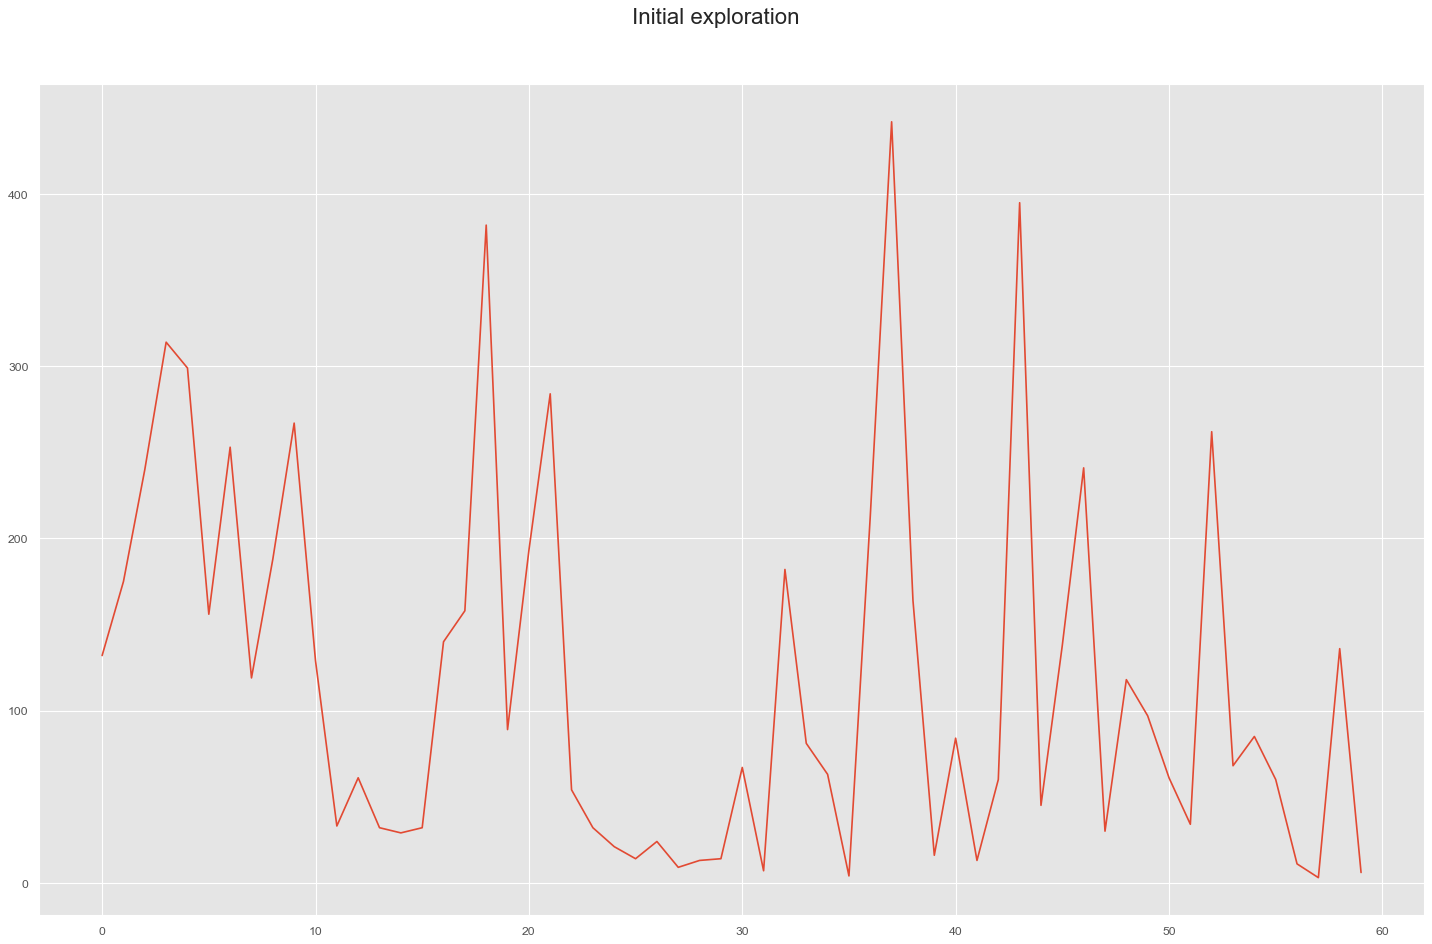

In [14]:
%matplotlib inline
plots = timesplots(df['case'], "Initial exploration")

8. Normalization & Train-test Split

In [16]:
from sklearn.model_selection import TimeSeriesSplit

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['case'] = scaler.fit_transform(np.array(df['case']).reshape(-1, 1))

In [20]:
TRAINPATH="/home/miki/Desktop/Deployment/bacillus-anthracis/data/traincsv/train.csv" 
TESTPATH="/home/miki/Desktop/Deployment/bacillus-anthracis/data/testcsv/test.csv"

train_percent = 0.8
min_time = df.date.min()
max_time = df.date.max()
time_between = max_time - min_time
train_cutoff = min_time + train_percent*time_between
train = df[df.date <= train_cutoff]
test = df[df.date > train_cutoff]
train.to_csv(TRAINPATH, index=False)
test.to_csv(TESTPATH, index=False)

In [21]:
test.reset_index(drop=True, inplace=True)

In [22]:
# train['case'] = data_normalize(train['case'])

In [23]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [24]:
X_train, y_train = makeXy(train['case'], 1)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (47, 1) (47,)


In [28]:
X_val, y_val = makeXy(test['case'], 1)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (11, 1) (11,)


In [29]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (47, 1, 1) (11, 1, 1)


9. Modelling

In [30]:
import tensorflow as tf
from keras.models import *
from keras.callbacks import *
from keras.optimizers import *
from keras.layers import Dense, LSTM, Dropout
import random 

2022-06-23 01:20:13.612110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 01:20:13.612135: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
def set_seed(seed):
    
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed);

In [34]:
def get_model(X_train, y_train):
    
    set_seed(33)
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.add(Dropout(rate=0.1))
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X_train,y_train,epochs=100,batch_size=25,verbose=0)
    return model

In [35]:
mm = get_model(X_train, y_train);

In [36]:
mm

In [37]:
mm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [38]:
MODELPATH  = '/home/miki/Desktop/Deployment/bacillus-anthracis/model'

In [39]:
save_weights= os.path.join(MODELPATH, 'Bacillus.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
mm.fit(x=X_train, y=y_train,callbacks=[save_best], validation_data=(X_val, y_val), shuffle=True)

2/2 [==============================] - 0s 242ms/step - loss: 0.2020 - val_loss: 0.1261


In [40]:
best_model = load_model(os.path.join('/home/miki/Desktop/Deployment/bacillus-anthracis/model/Bacillus.01-0.1261.hdf5'))
preds = best_model.predict(X_val)
pred = scaler.inverse_transform(preds)
pred = np.squeeze(pred)

1/1 [==============================] - 0s 149ms/step


In [41]:
pred

array([ 81.64926 ,  77.64606 ,  70.91875 ,  65.98487 , 110.684   ,
        72.21348 ,  75.38466 ,  70.7343  ,  61.856983,  60.437317,
        85.12708 ], dtype=float32)

10. Predictions & Plots

In [42]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['case'].loc[1:], pred)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 75.5307


In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Index')

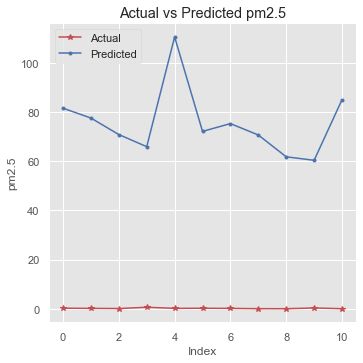

In [45]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(11), test['case'].loc[1:11], linestyle='-', marker='*', color='r')
plt.plot(range(11), pred[:11], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')